In [1]:
import numpy as np
import os, glob
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
sns.set_theme(style="darkgrid")
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)

In [2]:
# # merging csv files

# os.chdir("data")
# extension = 'csv'
# all_csvs = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
# #combine all files in the all_filenames list
# CHUNK_SIZE = 50000
# output_file = "./full.csv"
# write_header = 1

# for csv in all_csvs:
#     chunk_container = pd.read_csv(csv, chunksize=CHUNK_SIZE, header=write_header, sep=',', low_memory=False)
#     write_header = 0
#     for chunk in chunk_container:
#         chunk.to_csv(output_file, mode="a", index=False)

In [5]:
# os.chdir(r"C:\Users\qange\Documents\dataviz\TP_Immobilier")

data20 = pd.read_csv('data/full_2020.csv', sep=',', header=0, low_memory=False)
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612746 entries, 0 to 3612745
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   float64
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           float64
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero           

In [6]:
# memory optimization
from typing import List


def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    ''' apply the lowest float dtype possible '''
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ''' apply the lowest int dtype possible '''
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    ''' apply the category dtype to object '''
    for col in df.select_dtypes(include=['object']):
        if col not in datetime_features:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_datetime(df[col])
    return df


def optimize(df: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2019-1,2019-01-04,1,Vente,37220.0,26.0,NaN,RUE DE MONTHOLON,2730,1000.0,01053,Bourg-en-Bresse,01,NaN,NaN,01053000AI0298,NaN,NaN,8,19.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,20.0,1.0,NaN,NaN,NaN,NaN,NaN,5.209562,46.198841
1,2019-2,2019-01-04,1,Vente,185100.0,22.0,NaN,RUE GEN DELESTRAINT,1650,1000.0,01053,Bourg-en-Bresse,01,NaN,NaN,01053000AM0095,NaN,NaN,137,NaN,154,61.509998,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,62.0,3.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198765
2,2019-2,2019-01-04,1,Vente,185100.0,22.0,B,RUE GEN DELESTRAINT,1650,1000.0,01053,Bourg-en-Bresse,01,NaN,NaN,01053000AM0095,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198765
3,2019-3,2019-01-08,1,Vente,209000.0,3.0,NaN,RUE DES CHAMPAGNES,0043,1160.0,01314,Priay,01,NaN,NaN,013140000E1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,90.0,4.0,S,sols,NaN,NaN,940.0,5.282104,45.999565
4,2019-4,2019-01-07,1,Vente,134900.0,5.0,NaN,LOT LE BIOLAY,A003,1370.0,01350,Saint-Étienne-du-Bois,01,NaN,NaN,01350000AA0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,101.0,5.0,S,sols,NaN,NaN,490.0,5.299929,46.293278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612741,2019-1545794,2019-12-30,1,Vente,1400000.0,24.0,NaN,RUE SAINT SAUVEUR,8752,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AM0018,NaN,NaN,3,101.400002,4,43.700001,8,NaN,NaN,NaN,NaN,NaN,3,4.0,Local industriel. commercial ou assimilé,100.0,0.0,NaN,NaN,NaN,NaN,NaN,2.348095,48.866432
3612742,2019-1545795,2019-12-17,1,Adjudication,620000.0,14.0,NaN,RUE PAVEE,7195,75004.0,75104,Paris 4e Arrondissement,75,NaN,NaN,75104000AM0014,NaN,NaN,3,48.500000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,45.0,2.0,NaN,NaN,NaN,NaN,NaN,2.360708,48.856186
3612743,2019-1545796,2019-12-05,1,Vente,370000.0,23.0,NaN,RUE POISSONNIERE,7561,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AH0067,NaN,NaN,1,38.650002,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,47.0,0.0,NaN,NaN,NaN,NaN,NaN,2.347484,48.869732
3612744,2019-1545797,2019-12-12,1,Adjudication,44000.0,2.0,NaN,RUE NOTRE DAME DES VICTOIRES,6840,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AJ0127,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.341263,48.866493


# Analyse de forme

Le présent jeu de données « Demandes de valeurs foncières », publié et produit par la direction générale des finances publiques, permet de connaître les transactions immobilières intervenues au cours des cinq dernières années sur le territoire métropolitain et les DOM-TOM, à l’exception de l’Alsace, de la Moselle et de Mayotte. Les données contenues sont issues des actes notariés et des informations cadastrales

La cible (La valeur foncière): Il s’agit du montant ou de l’évaluation déclaré(e) dans le cadre d’une mutation à titre onéreux. Elle inclut :
- les frais d’agence, s’ils
sont à la charge du
vendeur.
- l’éventuelle TVA.

La notion de lot : un lot de copropriété est constitué d’une partie privative (appartement, cave, etc.) et d’une quote-part de partie commune (tantièmes). Seuls les 5 premiers lots sont mentionnés. Si le nombre de lots est supérieur à 5, ils ne sont pas restitués.

Le code de type local : 1 : maison ; 2 : appartement ; 3 : dépendance (isolée) ; 4 : local industriel et commercial ou assimilés.

In [7]:
(data20.isna().sum()/data20.shape[0]).sort_values(ascending=False)

lot5_surface_carrez             0.999733
lot4_surface_carrez             0.999430
ancien_id_parcelle              0.998850
ancien_nom_commune              0.998822
ancien_code_commune             0.998822
lot5_numero                     0.998197
lot3_surface_carrez             0.997919
numero_volume                   0.997329
lot4_numero                     0.996268
lot3_numero                     0.989223
lot2_surface_carrez             0.979028
adresse_suffixe                 0.956883
code_nature_culture_speciale    0.955495
nature_culture_speciale         0.955495
lot2_numero                     0.934991
lot1_surface_carrez             0.915801
lot1_numero                     0.688300
surface_reelle_bati             0.589431
nombre_pieces_principales       0.456368
code_type_local                 0.455620
type_local                      0.455620
adresse_numero                  0.409330
surface_terrain                 0.315920
code_nature_culture             0.315900
nature_culture  

On observe de nombreuses colonnes avec plus de 90% de valeurs manquantes. Elles seront retirés de l'analyse. Attention, ici on retire donc les colonnes au delà du premier lot pour simplifier l'analyse. On garde néanmoins la colonne lot1_numero car la présence ou l'absence d'un lot est informative quant à la valeur foncière.

# Analyse du Fond

## Elimination des colonnes inutiles

In [8]:
unique_counts = pd.DataFrame.from_records([(col, data20[col].nunique()) for col in data20.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
29,code_type_local,4
30,type_local,4
3,nature_mutation,6
33,code_nature_culture,27
34,nature_culture,27
6,adresse_suffixe,40
32,nombre_pieces_principales,41
28,nombre_lots,87
12,code_departement,97
36,nature_culture_speciale,121


In [9]:
data20 = data20[data20.columns[data20.isna().sum()/data20.shape[0] <= 0.9]]

In [10]:
# on drop également les colonnes identifiant ainsi que les colonnes redondantes : code_commune, adresse_numero, adresse_code_voie, adresse_nom_voie, et code_nature_culture 
data20.drop(['id_mutation', 'id_parcelle', 'code_postal', 'code_type_local', 'code_commune', 'adresse_numero', 'adresse_code_voie', 'adresse_nom_voie', 'code_nature_culture'], inplace=True, axis=1)
data20.columns

Index(['date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'nom_commune', 'code_departement', 'lot1_numero',
       'nombre_lots', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'nature_culture', 'surface_terrain',
       'longitude', 'latitude'],
      dtype='object')

<AxesSubplot:>

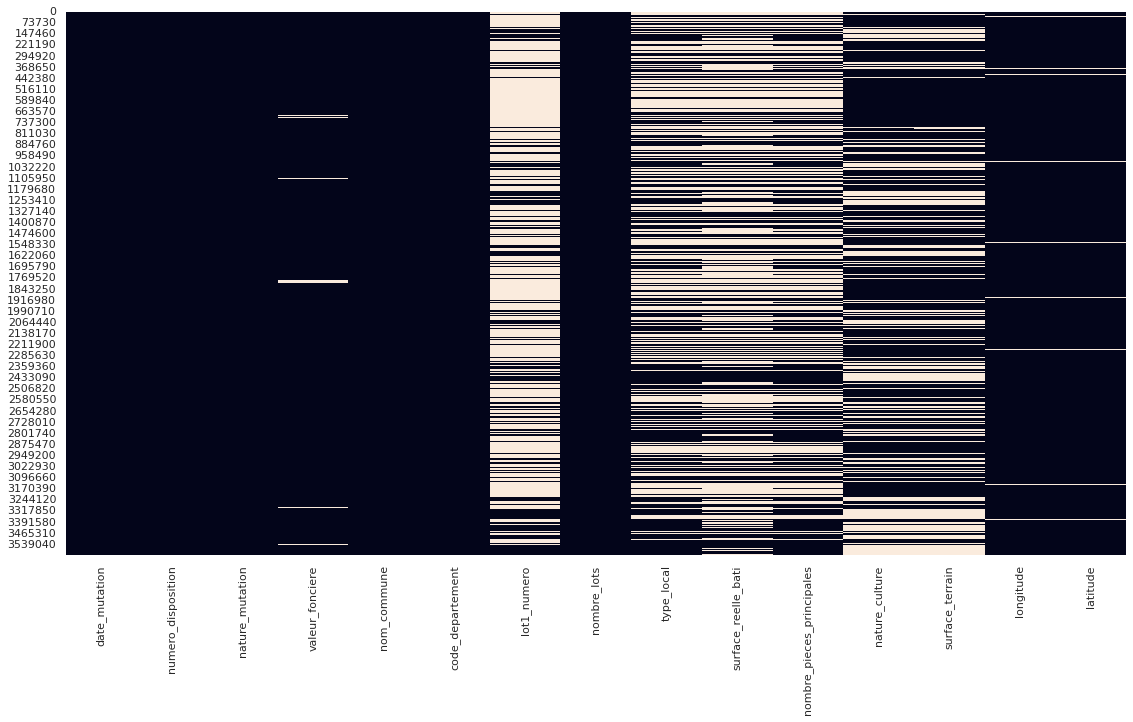

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data20.isna(), cbar=False)

On observe une tendance dans les valeurs manquantes. Il y notamment deux sous groupes de colonnes qui ont des valeurs manquantes pour les mêmes observations : 
- type_local, surface_relle_bati, nombre_pieces_principales
- surface_terrain, nature_culture

## Création de feature à partir de la colonne "date_mutation"

In [12]:
def preprocess_data(df, date_col):

    lowercase = lambda x: str(x).lower()
    df.rename(lowercase, axis="columns", inplace=True)
    
    # convert to datetime
    df[date_col] =  pd.to_datetime(df[date_col])

    # derive features based on datetime column
    df['mois_mutation']=df[date_col].dt.month

    return df

data20 = preprocess_data(data20, 'date_mutation')
data20.to_csv('data/filtered_2020.csv', index=False)



## Examen de la colonne cible


In [ ]:
data20 = pd.read_csv('data/filtered_2020.csv', sep=',', header=0, low_memory=False)
data20 = optimize(data20, ['date_mutation'])

Skewness: 33.822948
Kurtosis: 1527.457031


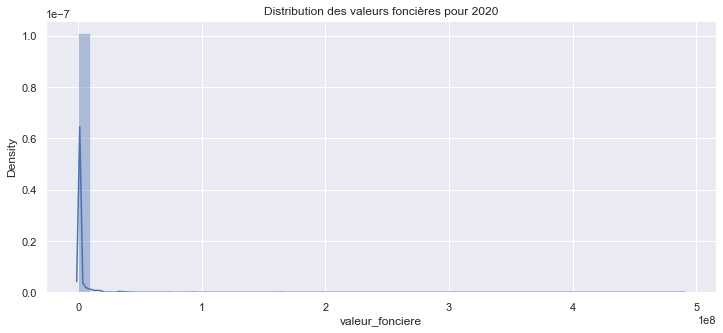

In [ ]:
# Skew and kurt
print("Skewness: %f" % data20['valeur_fonciere'].skew())
print("Kurtosis: %f" % data20['valeur_fonciere'].kurt())

# histogran to evaluate target distribution
plt.rcParams["figure.figsize"] = 12,5

plt.title('Distribution des valeurs foncières pour 2020')
sns.distplot(data20['valeur_fonciere']);

La distribution des valeurs foncières contient quelques outliers importants. Elle est asymétrique à droite.

## Histogrames des variables continues

100%|██████████| 4/4 [01:37<00:00, 24.43s/it]


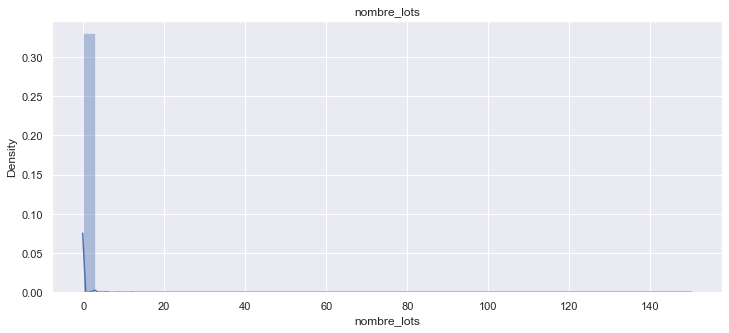

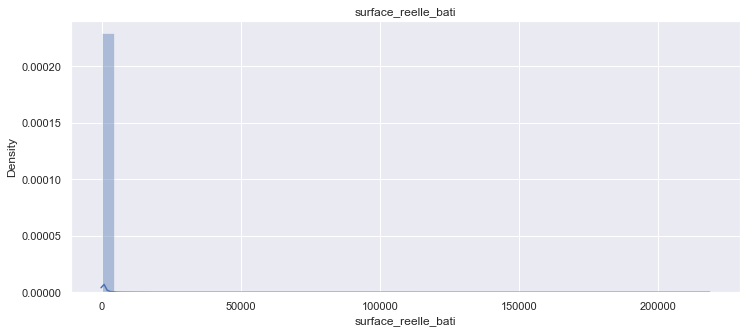

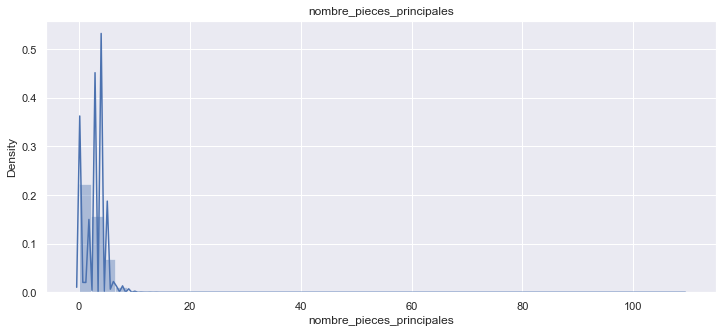

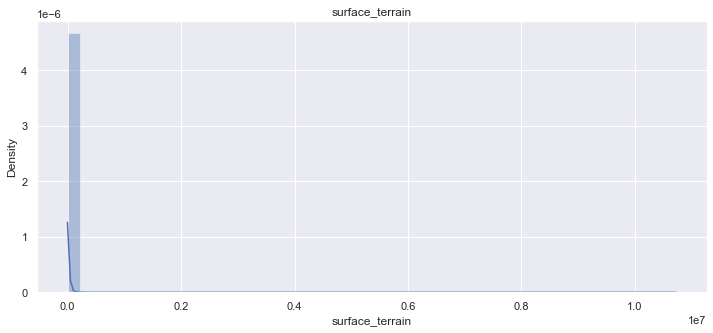

In [ ]:
from tqdm import tqdm

numeric_feats = ['nombre_lots', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain']
for col in tqdm(numeric_feats):
    plt.figure()
    plt.title(f"{col}")
    sns.distplot(data20[col])

Une fois de plus les distributions des variables continues sont asymétriques à droite. Il faut traiter les outliers afin d'avoir une réelle analyse.

## Handling outliers

Ici nous avons beaucoup de données à disposition et d'après l'exploration graphique, les outliers sont très peu nombreux. Cependant, comme axe d'amélioration, nous pourrions envisager d'utiliser une approche multivariée pour rechercher les outliers.

In [ ]:
def zscore_outliers(data, column, n):
    """
    Tag outliers in dataset in regard from a specific column
    In literature, often 3 std from the mean is consider as an outlier
    Return two boolean columns : upper_outlier and lower_outlier
    """

    # here we remove outliers unilateraly, but we could aggregate on meaningful column

    data['lower_bound'] = data[column].mean() - (n * data[column].std())
    data['upper_bound'] = data[column].mean() + (n * data[column].std())

    data["upper_outlier"] = data[column] > data['upper_bound']
    data["lower_outlier"] = data[column] < data['lower_bound']

    data = data.loc[(data['upper_outlier'] != 1) & (data['lower_outlier'] != 1)]

    data.drop(['upper_bound', 'upper_outlier', 'lower_bound', 'lower_outlier'], axis=1, inplace=True)

    return data

to_handle = ['valeur_fonciere', 'nombre_lots', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain']
for col in to_handle:
    data20 = zscore_outliers(data20, col, 2)


100%|██████████| 3/3 [00:46<00:00, 15.42s/it]


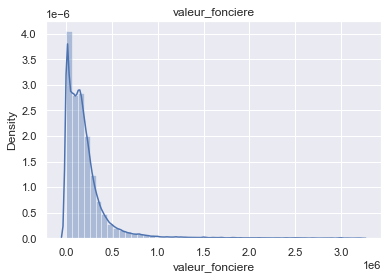

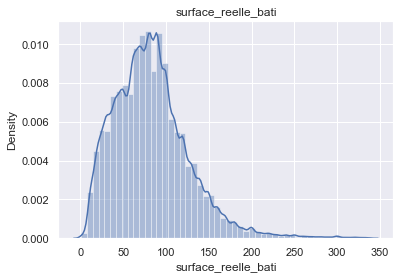

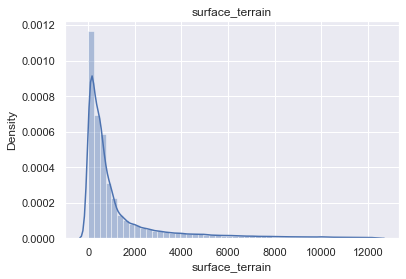

In [ ]:
outliers_handled = ['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain']

for col in tqdm(outliers_handled):
    plt.figure()
    plt.title(f"{col}")
    sns.distplot(data20[col])

## Variables Qualitatives

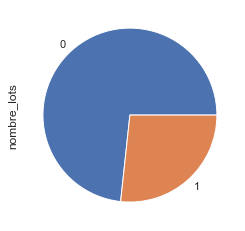

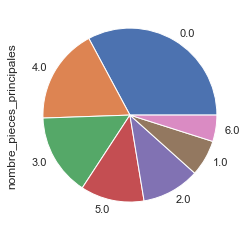

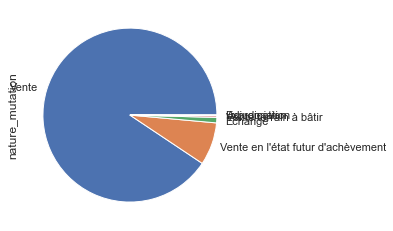

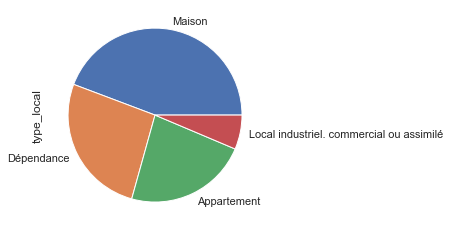

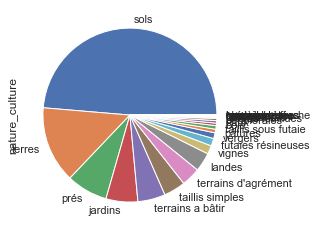

In [ ]:
for col in ['nombre_lots', 'nombre_pieces_principales']:
        data20[col] = data20[col].astype('category')


for col in ['nombre_lots', 'nombre_pieces_principales', 'nature_mutation', 'type_local', 'nature_culture']:
        plt.figure()
        data20[col].value_counts(normalize=True).plot.pie()

# Relation Target / Variables

In [ ]:
for col in data20.columns:
    if len(data20[col].value_counts()) < 10:
        print(data20[col].value_counts(normalize=True))
        print('##############################################')

Vente                                 0.909685
Vente en l'état futur d'achèvement    0.076372
Echange                               0.009488
Vente terrain à bâtir                 0.003123
Adjudication                          0.001072
Expropriation                         0.000260
Name: nature_mutation, dtype: float64
##############################################
0    0.726452
1    0.273548
Name: nombre_lots, dtype: float64
##############################################
Maison                                      0.455816
Dépendance                                  0.268570
Appartement                                 0.225873
Local industriel. commercial ou assimilé    0.049742
Name: type_local, dtype: float64
##############################################
0.0    0.318934
4.0    0.180431
3.0    0.153546
5.0    0.121311
2.0    0.108319
1.0    0.067354
6.0    0.050105
Name: nombre_pieces_principales, dtype: float64
##############################################


In [ ]:
# création de sous-ensembles has_lot / no_lot
has_lot = data20[data20['nombre_lots'] == 1]
no_lot = data20[data20['nombre_lots'] == 0]

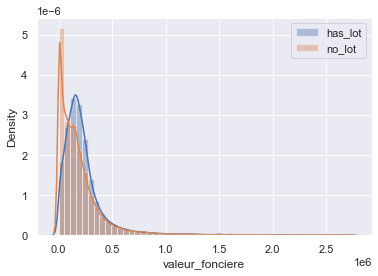

In [ ]:
plt.figure()
sns.distplot(has_lot['valeur_fonciere'], label='has_lot')
sns.distplot(no_lot['valeur_fonciere'], label='no_lot')
plt.legend()

Le fait que le bien possède un lot semble avoir une influence nette sur le prix. Nous pouvons tester cela à l'aide d'un test d'hypothèse afin de nous assurer du caractère satistiquement significatif de celle-ci.

In [ ]:
from scipy.stats import ttest_ind

def t_test(col):
    alpha = 0.01
    stat, p = ttest_ind(has_lot[col].dropna(), no_lot[col].dropna())
    if p < alpha:
        return 'H0 est rejetée, le test est statistiquement significatif'
    else :
        return 'On ne peut rejeter H0, le test n\'est pas significatif'

t_test('valeur_fonciere')

'H0 est rejetée, le test est statistiquement significatif'

<AxesSubplot:xlabel='nombre_pieces_principales', ylabel='valeur_fonciere'>

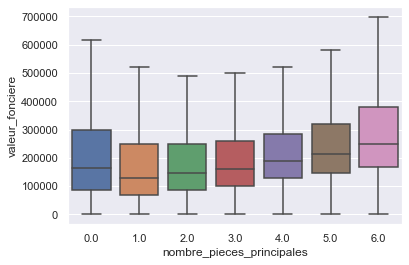

In [ ]:
sns.boxplot(x="nombre_pieces_principales", y="valeur_fonciere",
            data=data20, showfliers = False)

Il semblerait que le nombre de pièces influe sur le prix de façon positive.

<AxesSubplot:xlabel='mois_mutation', ylabel='valeur_fonciere'>

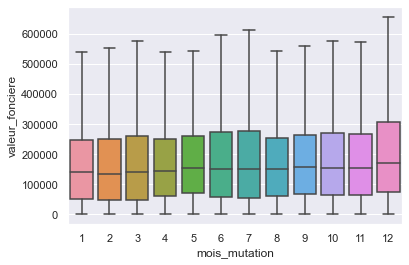

In [ ]:
sns.boxplot(x="mois_mutation", y="valeur_fonciere",
            data=data20, showfliers = False)

Il semblerait que les mois de juin, juillet mais surtout décembre ce démarque à la hausse.

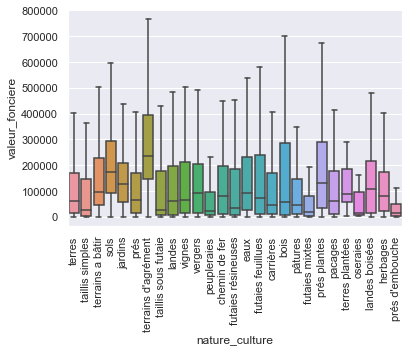

In [ ]:
ax = sns.boxplot(x="nature_culture", y="valeur_fonciere",
            data=data20, showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) ;          

Le fait d'avoir un terrain d'agrément aurait un fort impact sur la valeur foncière.

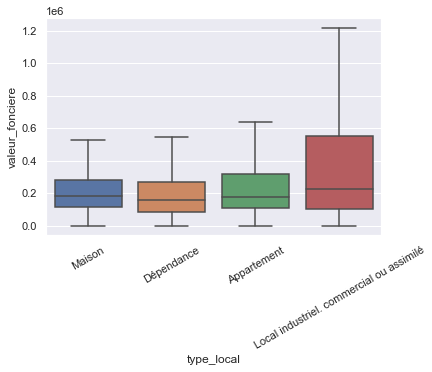

In [ ]:
ax = sns.boxplot(x="type_local", y="valeur_fonciere",
            data=data20, showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) ;          

Outliers mis à part, il semblerait que les locaux commerciaux atteignent souvent des valeurs plus élevées.

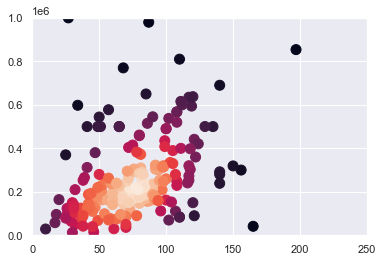

In [ ]:
from scipy.stats import gaussian_kde

sampled = data20.sample(frac =.1)
sampled.dropna(inplace=True)

# Calculate the point density
xy = np.vstack([sampled.surface_reelle_bati,sampled.valeur_fonciere])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(sampled.surface_reelle_bati, sampled.valeur_fonciere, c=z, s=100)
plt.xlim([0, 250])
plt.ylim([0, 1e6])

plt.show()

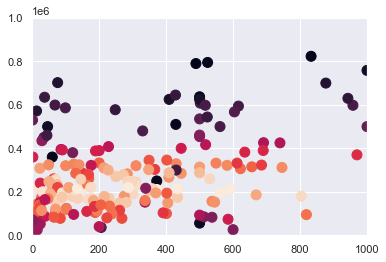

In [ ]:
# Calculate the point density
xy = np.vstack([sampled.surface_reelle_bati,sampled.valeur_fonciere])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(sampled.surface_terrain, sampled.valeur_fonciere, c=z, s=100)
plt.xlim([0, 1000])
plt.ylim([0, 1e6])

plt.show()

# Map des mutations

In [ ]:
sampled['valeur_fonciere_q5'] = pd.qcut(sampled['valeur_fonciere'], 5, labels=False)
sampled['valeur_fonciere_q5']

282518     0
590292     1
2185573    2
766767     1
347234     0
          ..
2000306    4
930837     1
1646822    3
1813538    2
278598     2
Name: valeur_fonciere_q5, Length: 208, dtype: int64

In [ ]:
import folium

map_osm = folium.Map(location=[47, 2], zoom_start=5)

sampled.apply(lambda row : folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                              radius=10, fill_color=row['valeur_fonciere_q5'])
                                             .add_to(map_osm), axis=1)

map_osm